<a href="https://colab.research.google.com/github/Debraj-80/ML-Diabetes-Classifier/blob/main/diabetes_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from prettytable import PrettyTable
from IPython.display import display


## Load Dataset

In [2]:
# === Load CSV ===
url ="https://raw.githubusercontent.com/Debraj-80/ML-Diabetes-Classifier/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)


## Quick EDA

Shape: (768, 9)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Last 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0



Target column assumed as: Outcome
Outcome
0    500
1    268
Name: count, dtype: int64


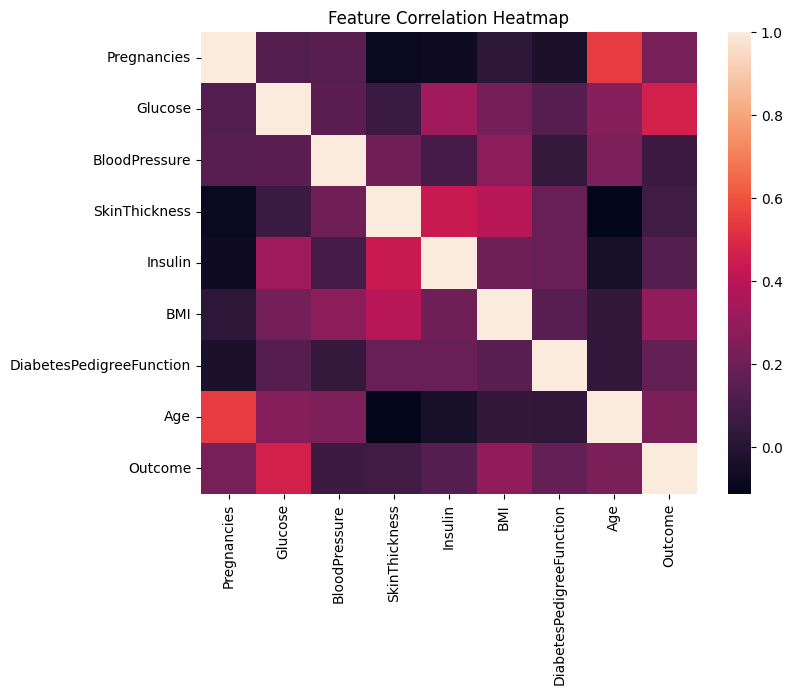

In [3]:

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nFirst 5 rows:"); display(df.head())
print("\nLast 5 rows:"); display(df.tail())

# Assume target column name
target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
print("\nTarget column assumed as:", target_col)
print(df[target_col].value_counts())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## Train/Test Split & Scaling

In [4]:

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Define Models

In [5]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


## Train & Evaluate (ROC Curves + Metrics)


==== Logistic Regression ====
Accuracy: 0.7143
ROC-AUC: 0.8230
Confusion Matrix:
 [[82 18]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


==== KNN ====
Accuracy: 0.7013
ROC-AUC: 0.7405
Confusion Matrix:
 [[80 20]
 [26 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


==== SVM ====
Accuracy: 0.7532
ROC-AUC: 0.7922
Confusion Matrix:
 [[83 17]
 [21 33]]
Classification Report:
 

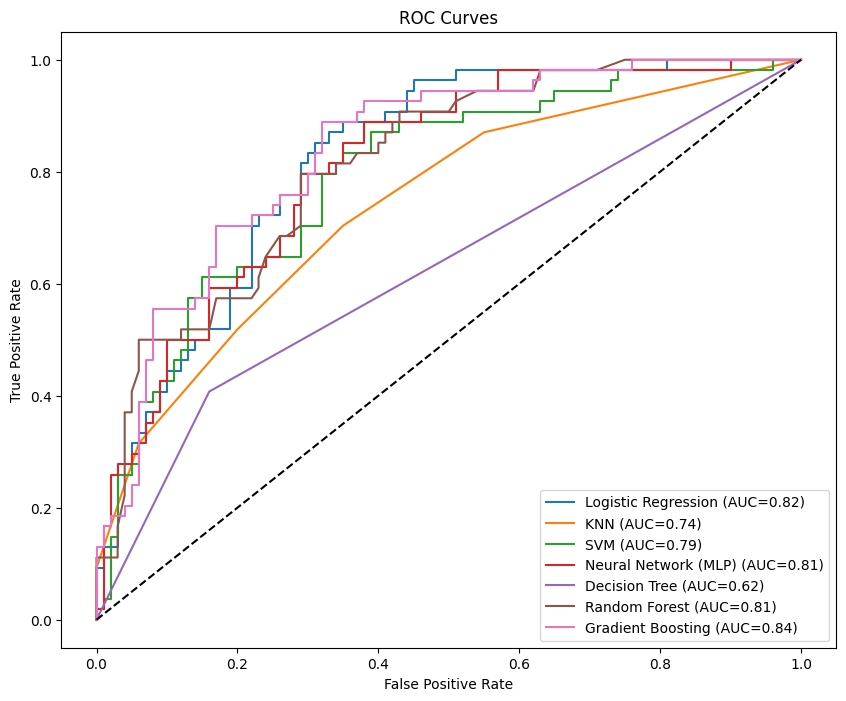

,Model,Accuracy,ROC-AUC
0,Gradient Boosting,0.753247,0.837593
1,Logistic Regression,0.714286,0.822963
2,Random Forest,0.740260,0.813889
3,Neural Network (MLP),0.727273,0.811111
4,SVM,0.753247,0.792222
5,KNN,0.701299,0.740463
6,Decision Tree,0.688312,0.623704


In [6]:

results = {}

plt.figure(figsize=(10,8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results[name] = {"Accuracy": acc, "ROC-AUC": auc}

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

    print(f"\n==== {name} ====")
    print("Accuracy:", f"{acc:.4f}")
    print("ROC-AUC:", f"{auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

summary_df = pd.DataFrame(results).T.reset_index().rename(columns={'index':'Model'})
display(summary_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True))


## Predict New Patient (PrettyTable + Styled Table + Bar Chart)

Using custom patient input:
 (45, 130, 70, 35, 200, 0.5, 30, 0)
Logistic Regression: Positive (prob=1.00)
KNN: Positive (prob=0.60)
SVM: Positive (prob=0.51)
Neural Network (MLP): Positive (prob=1.00)
Decision Tree: Positive (prob=1.00)
Random Forest: Negative (prob=0.45)
Gradient Boosting: Negative (prob=0.27)

📊 Model Comparison (Console View):
+----------------------+-------------------------+------------+
|        Model         | Probability of Diabetes | Prediction |
+----------------------+-------------------------+------------+
| Logistic Regression  |         1.000000        |    Yes     |
|         KNN          |         0.600000        |    Yes     |
|         SVM          |         0.513026        |    Yes     |
| Neural Network (MLP) |         1.000000        |    Yes     |
|    Decision Tree     |         1.000000        |    Yes     |
|    Random Forest     |         0.450000        |     No     |
|  Gradient Boosting   |         0.265113        |     No     |
+----------

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-415259053.py:40: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  ).applymap(


,Model,Probability of Diabetes,Prediction
0,Decision Tree,1.000000,Yes
1,Logistic Regression,1.000000,Yes
2,Neural Network (MLP),1.000000,Yes
3,KNN,0.600000,Yes
4,SVM,0.513026,Yes
5,Random Forest,0.450000,No
6,Gradient Boosting,0.265113,No


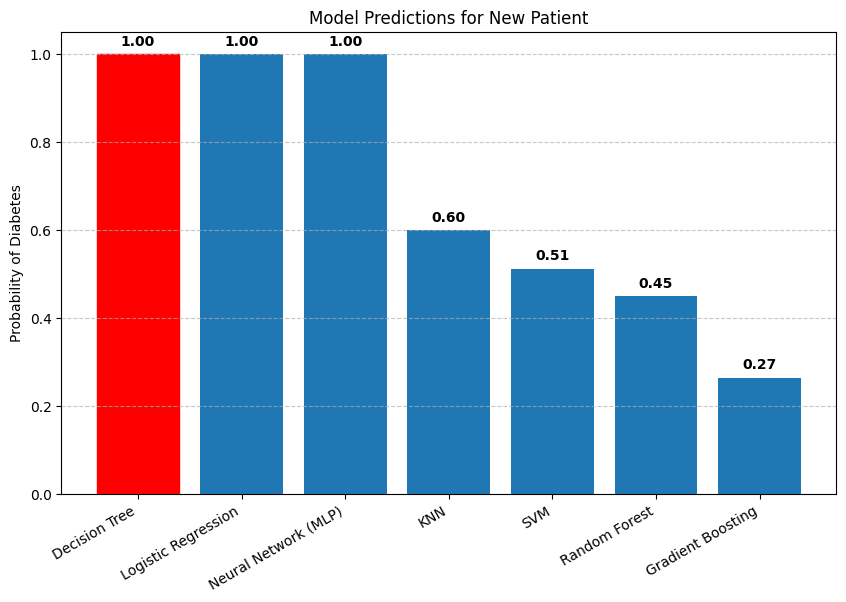

In [7]:

# Custom patient input
custom_input = (45, 130, 70, 35, 200, 0.5, 30, 0)  # must match feature order
print("Using custom patient input:\n", custom_input)
example_input = custom_input


arr = np.asarray(example_input).reshape(1, -1)
arr_scaled = scaler.transform(arr)

patient_probs = {}
for name, model in models.items():
    pred = model.predict(arr_scaled)[0]
    prob = model.predict_proba(arr_scaled)[0, 1]
    patient_probs[name] = prob
    label = "Positive" if pred == 1 else "Negative"
    print(f"{name}: {label} (prob={prob:.2f})")

# PrettyTable (console view)
table = PrettyTable()
table.field_names = ["Model", "Probability of Diabetes", "Prediction"]
for model_name, prob in patient_probs.items():
    prediction = "Yes" if prob >= 0.5 else "No"
    table.add_row([model_name, f"{prob:.6f}", prediction])
print("\n📊 Model Comparison (Console View):")
print(table)

# Styled DataFrame
results_df = pd.DataFrame({
    "Model": list(patient_probs.keys()),
    "Probability of Diabetes": list(patient_probs.values())
})
results_df["Prediction"] = results_df["Probability of Diabetes"].apply(lambda x: "Yes" if x >= 0.5 else "No")
results_df = results_df.sort_values(by="Probability of Diabetes", ascending=False).reset_index(drop=True)

try:
    styled = results_df.style.set_table_styles(
        [{'selector': 'th', 'props': [('background-color', '#2d7dd2'),
                                      ('color', 'white'),
                                      ('font-weight', 'bold')]}]
    ).applymap(
        lambda x: 'color: green; font-weight:bold;' if x=="Yes" else 'color: red; font-weight:bold;',
        subset=["Prediction"]
    )
    display(styled)
except Exception as e:
    print("(Styled table display skipped)", e)
    display(results_df)

# Bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(results_df["Model"], results_df["Probability of Diabetes"])
bars[0].set_color('r')
plt.title("Model Predictions for New Patient")
plt.ylabel("Probability of Diabetes")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for i, prob in enumerate(results_df["Probability of Diabetes"]):
    plt.text(i, prob + 0.02, f"{prob:.2f}", ha="center", fontsize=10, fontweight="bold")
plt.show()
